# 6.2 Data Exploration

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/imdb_movies_cleaned.csv', index_col=[0])

In [3]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew     status  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   Released   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   Released   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   Released   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   Released   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   Released   

             languages       budget       revenue  release_year  \
0              English   75000000.0  2.716167e+08          2023   
1              English  460000000.0  2.316795e+09          2022   
2              English  100000000.0  7.244590e+08          2023   
3   Spanish, Castilian   12300000.0  3.420000e+07          2023   
4              English   77000000.0  3.409420e+08          2023   

  country_proper rating    primary_genre  
0      Australia   High            Drama  
1      Australia   High  Science Fiction  
2      Australia   High        Animation  
3      Australia   High        Animation  
4  United States    Mid           Action

In [4]:
#rounding budget and revenue values to millions
df['revenue_in_mil'] = df['revenue']/10**6
df['budget_in_mil'] = df['budget']/10**6

In [5]:
df['revenue_in_mil'] = df['revenue_in_mil'].round(2)
df['budget_in_mil'] = df['budget_in_mil'].round(2)

In [6]:
#checking output
df[['revenue', 'revenue_in_mil', 'budget', 'budget_in_mil']]

revenue  revenue_in_mil       budget  budget_in_mil
0      2.716167e+08          271.62   75000000.0          75.00
1      2.316795e+09         2316.79  460000000.0         460.00
2      7.244590e+08          724.46  100000000.0         100.00
3      3.420000e+07           34.20   12300000.0          12.30
4      3.409420e+08          340.94   77000000.0          77.00
...             ...             ...          ...            ...
10173  9.353729e+06            9.35    7000000.0           7.00
10174  6.698361e+06            6.70    9145817.8           9.15
10175  2.299799e+07           23.00   21800000.0          21.80
10176  4.756613e+08          475.66  116000000.0         116.00
10177  5.394018e+08          539.40   92400000.0          92.40

[9817 rows x 4 columns]

## Exploring Relationships

In [7]:
df.describe()

score        budget       revenue  release_year  revenue_in_mil  \
count  9817.000000  9.817000e+03  9.817000e+03   9817.000000     9817.000000   
mean     64.883264  6.229483e+07  2.546494e+08   2007.674646      254.649400   
std       9.897942  5.422786e+07  2.786202e+08     15.297947      278.620116   
min      10.000000  1.000000e+00  1.000000e+00   1903.000000        0.000000   
25%      60.000000  1.400000e+07  2.864956e+07   2001.000000       28.650000   
50%      66.000000  4.920000e+07  1.465959e+08   2012.000000      146.600000   
75%      72.000000  1.020000e+08  4.253123e+08   2019.000000      425.310000   
max     100.000000  4.600000e+08  2.923706e+09   2023.000000     2923.710000   

       budget_in_mil  
count    9817.000000  
mean       62.294802  
std        54.227875  
min         0.000000  
25%        14.000000  
50%        49.200000  
75%       102.000000  
max       460.000000

In [8]:
#handling data errors
df = df[df['revenue_in_mil'] != 0]

In [9]:
df = df[df['budget_in_mil'] != 0]

In [10]:
#checking output
df.describe()

score        budget       revenue  release_year  revenue_in_mil  \
count  9784.000000  9.784000e+03  9.784000e+03   9784.000000     9784.000000   
mean     64.896361  6.247668e+07  2.553734e+08   2007.696750      255.373437   
std       9.880617  5.421983e+07  2.787733e+08     15.274788      278.773301   
min      10.000000  5.500000e+03  5.199000e+03   1903.000000        0.010000   
25%      60.000000  1.455100e+07  2.903452e+07   2001.000000       29.032500   
50%      66.000000  5.000000e+07  1.477030e+08   2012.000000      147.705000   
75%      72.000000  1.020500e+08  4.257555e+08   2019.000000      425.752500   
max     100.000000  4.600000e+08  2.923706e+09   2023.000000     2923.710000   

       budget_in_mil  
count    9784.000000  
mean       62.476652  
std        54.219845  
min         0.010000  
25%        14.552500  
50%        50.000000  
75%       102.050000  
max       460.000000

In [11]:
df.shape

(9784, 16)

In [12]:
#creating a data subset
sub = df[['score', 'budget_in_mil', 'revenue_in_mil']]

In [13]:
#checking for correlations
sub.corr()

score  budget_in_mil  revenue_in_mil
score           1.000000      -0.046006        0.080239
budget_in_mil  -0.046006       1.000000        0.732304
revenue_in_mil  0.080239       0.732304        1.000000

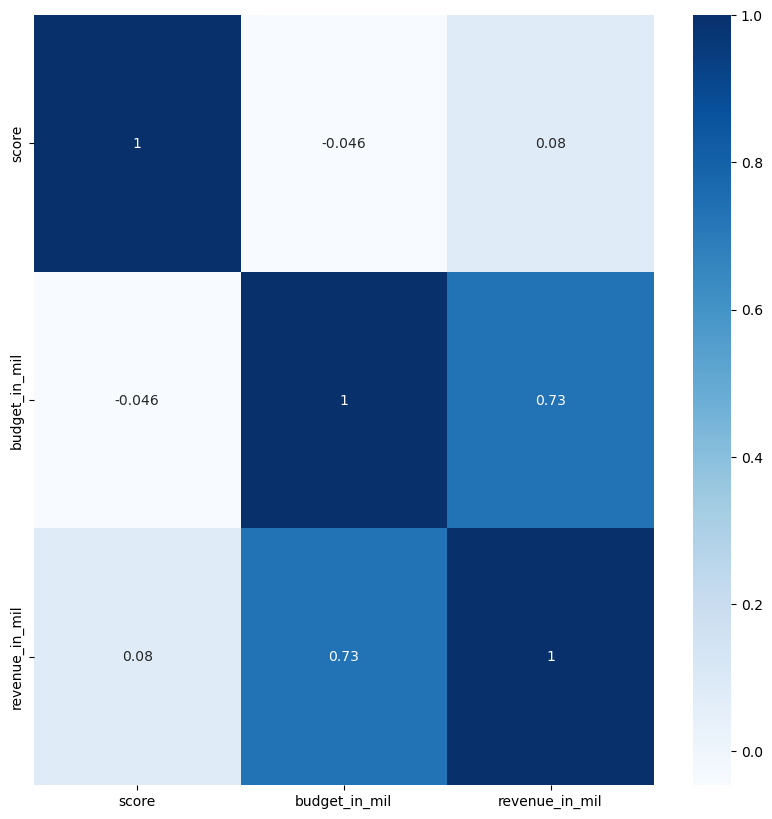

In [14]:
#creating a correlation matrix using seaborn and matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), cmap ='Blues', annot = True, ax = ax)

#### The correlation matrix shows a strong positive relationship between budget and revenue variables with a correlation coefficient R-squared = 0.73.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


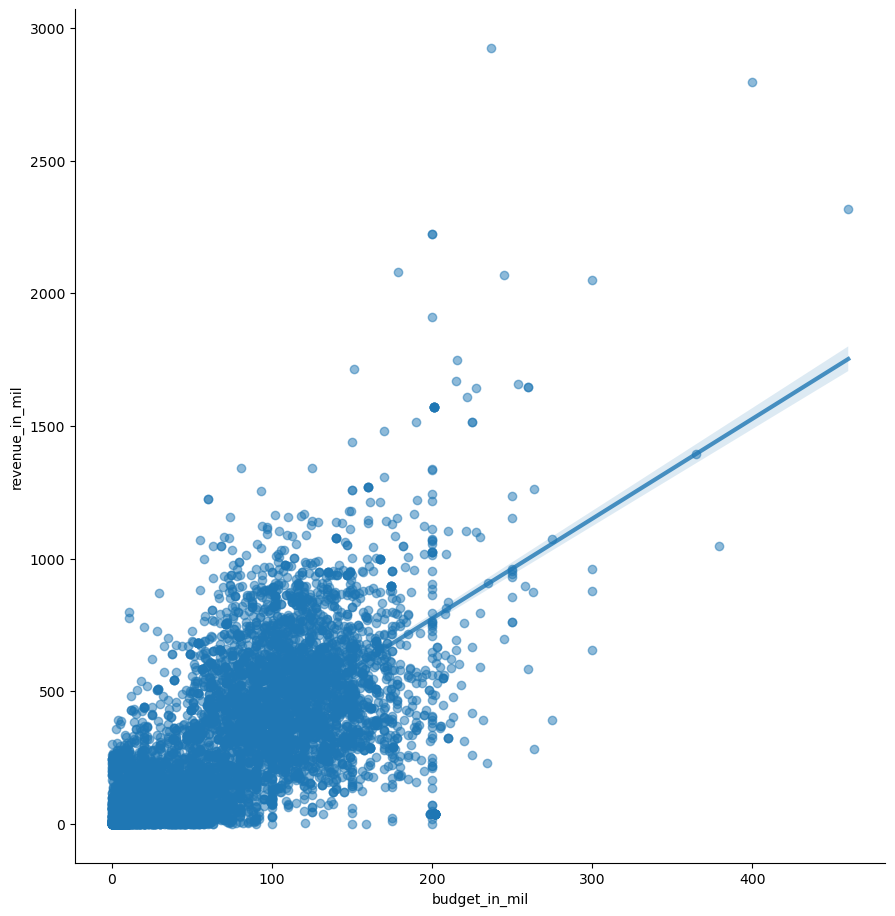

In [15]:
#creating a scatterplot to examine budget and revenue variables
sp = sns.lmplot(data=df,
                x='budget_in_mil',
                y='revenue_in_mil',
                scatter_kws={'alpha':0.5},
                line_kws=dict(alpha=0.8, linewidth=3)
               )
sp.fig.set_figwidth(10)
sp.fig.set_figheight(10)

#### While there's a strong positive correlation between the budget and revenue variables, the scatterplot shows that this trend is not in fact exactly linear, which can be seen by the spread of values. While most of the datapoints are clustered around the line of best fit as it travels upwards, i.e. movies with higher budgets often generating higher revenues, there are, however, outliers or exceptions to this trend that could be attributed to the few instances of high budget movies generating low revenues or, vice-versa; low budget movies generating high revenues.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


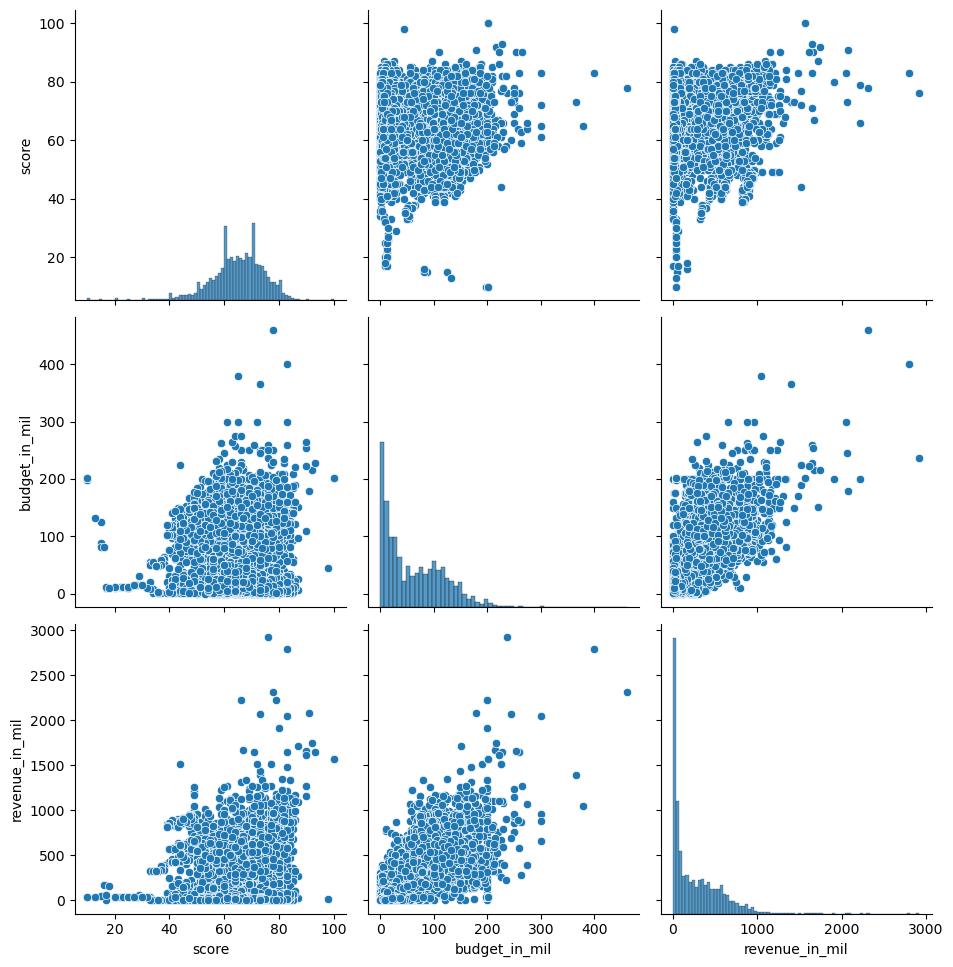

In [16]:
#creating a pairplot for the data subset
pp = sns.pairplot(sub)
pp.fig.set_figwidth(10)
pp.fig.set_figheight(10)

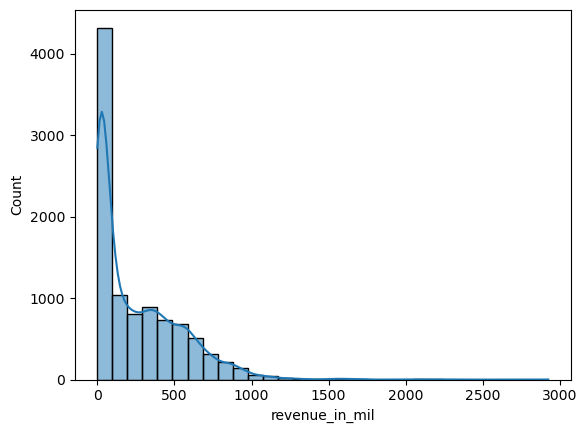

In [17]:
hist = sns.histplot(df['revenue_in_mil'], bins = 30, kde = True)

<Axes: xlabel='budget_in_mil', ylabel='Count'>

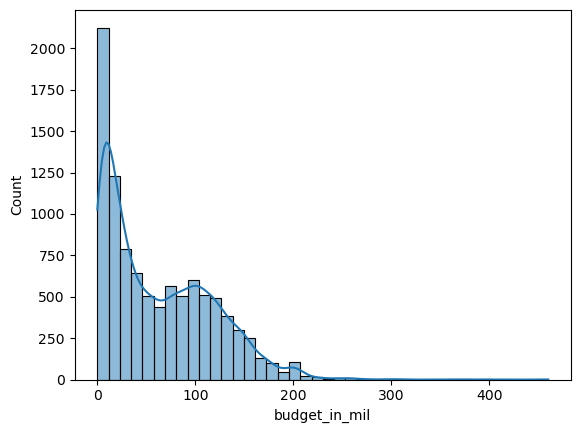

In [18]:
sns.histplot(df['budget_in_mil'], bins = 40, kde = True)

#### The data shows that the variables budget and revenue have left-skewed distribution.

In [19]:
#deriving budget_tier category
df.loc[df['budget_in_mil'] <= 5, 'budget_tier'] = 'Low-tier'
df.loc[(df['budget_in_mil'] > 5) & (df['budget_in_mil'] <= 50), 'budget_tier'] = 'Mid-tier'
df.loc[(df['budget_in_mil'] > 50) & (df['budget_in_mil'] <= 150), 'budget_tier'] = 'High-tier'
df.loc[df['budget_in_mil'] > 150, 'budget_tier'] = 'Top-tier'

In [20]:
df['budget_tier'].value_counts(dropna=False)

budget_tier
High-tier    4132
Mid-tier     3853
Low-tier     1163
Top-tier      636
Name: count, dtype: int64

In [21]:
#deriving profitability category
df['profitability'] = df['revenue_in_mil'] > df['budget_in_mil']

In [22]:
df['profitability'].value_counts(dropna=False)

profitability
True     8003
False    1781
Name: count, dtype: int64

#### 18% of movies are not profitable.

In [23]:
#deriving gross_profit variable
df['gross_profit'] = df['revenue_in_mil'] - df['budget_in_mil']

In [24]:
df['gross_profit'].describe()

count    9784.000000
mean      192.896786
std       241.902331
min      -199.550000
25%         8.420000
50%        92.730000
75%       324.450000
max      2686.710000
Name: gross_profit, dtype: float64

<Axes: xlabel='gross_profit', ylabel='Count'>

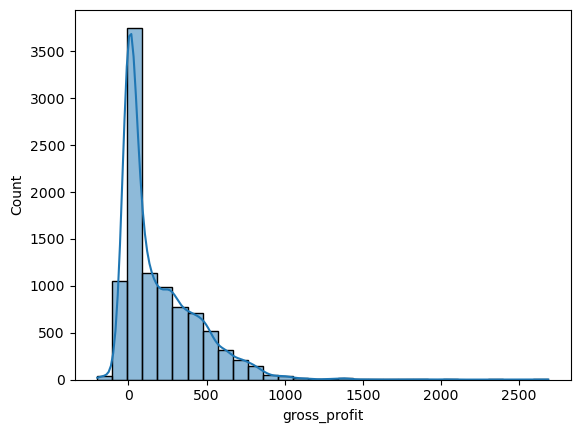

In [25]:
sns.histplot(df['gross_profit'], bins = 30, kde = True)

In [26]:
#deriving profit category
df.loc[df['gross_profit'] <= 0, 'profit_tier'] = 'No profit'
df.loc[(df['gross_profit'] > 0) & (df['gross_profit'] <= 50), 'profit_tier'] = 'Low profit'
df.loc[(df['gross_profit'] > 50) & (df['gross_profit'] <= 150), 'profit_tier'] = 'Mid profit'
df.loc[(df['gross_profit'] > 150) & (df['gross_profit'] <= 500), 'profit_tier'] = 'High profit'
df.loc[df['gross_profit'] > 500, 'profit_tier'] = 'Giant profit'

In [27]:
df['profit_tier'].value_counts(dropna=False)

profit_tier
High profit     3009
Low profit      2254
No profit       1781
Mid profit      1582
Giant profit    1158
Name: count, dtype: int64

In [28]:
#deriving ROI variable
df['ROI'] = (df['revenue_in_mil'] - df['budget_in_mil']) / df['budget_in_mil']
df['ROI'] = df['ROI'].round(2)

In [29]:
#Checking output
df['ROI'].describe()

count     9784.000000
mean        16.712538
std        359.904750
min         -1.000000
25%          0.560000
50%          2.380000
75%          4.910000
max      30054.000000
Name: ROI, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


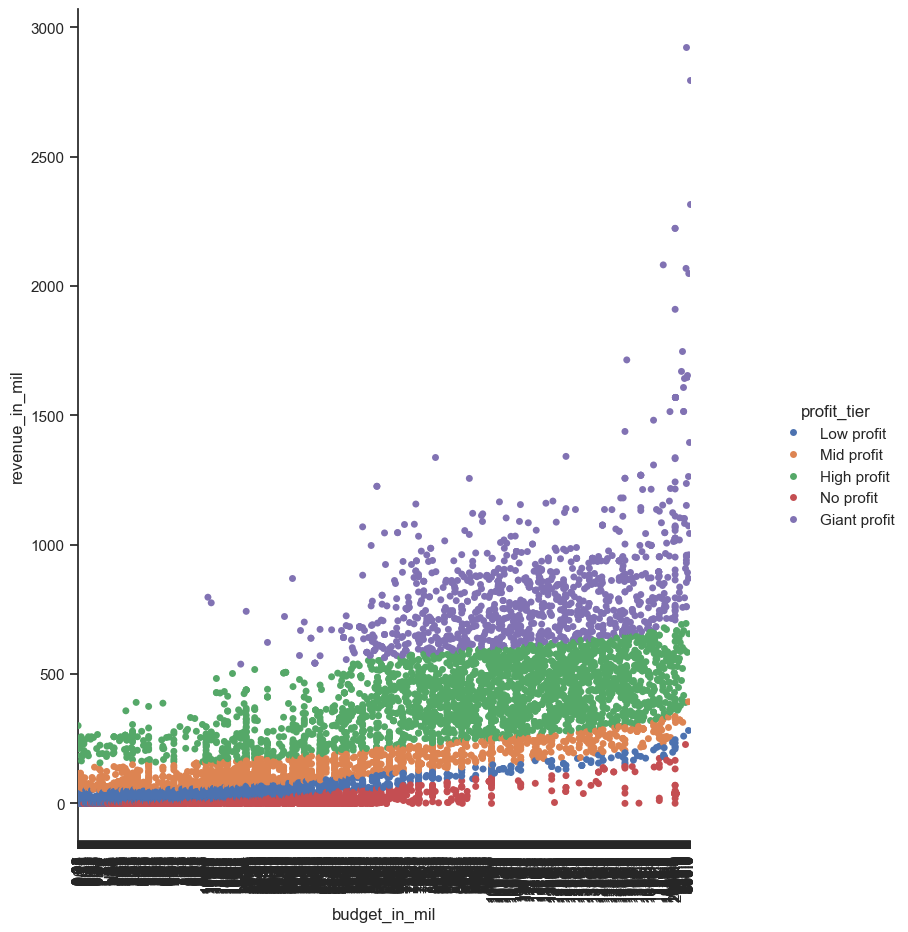

In [30]:
#creating a categorical plot
sns.set(style="ticks")
cp = sns.catplot(data=df,
                x='budget_in_mil',
                y='revenue_in_mil',
                hue='profit_tier'
               )
cp.tick_params(axis='x', rotation=90)
cp.fig.set_figwidth(10)
cp.fig.set_figheight(10)

#### Some high-budget movies made no profit at all.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


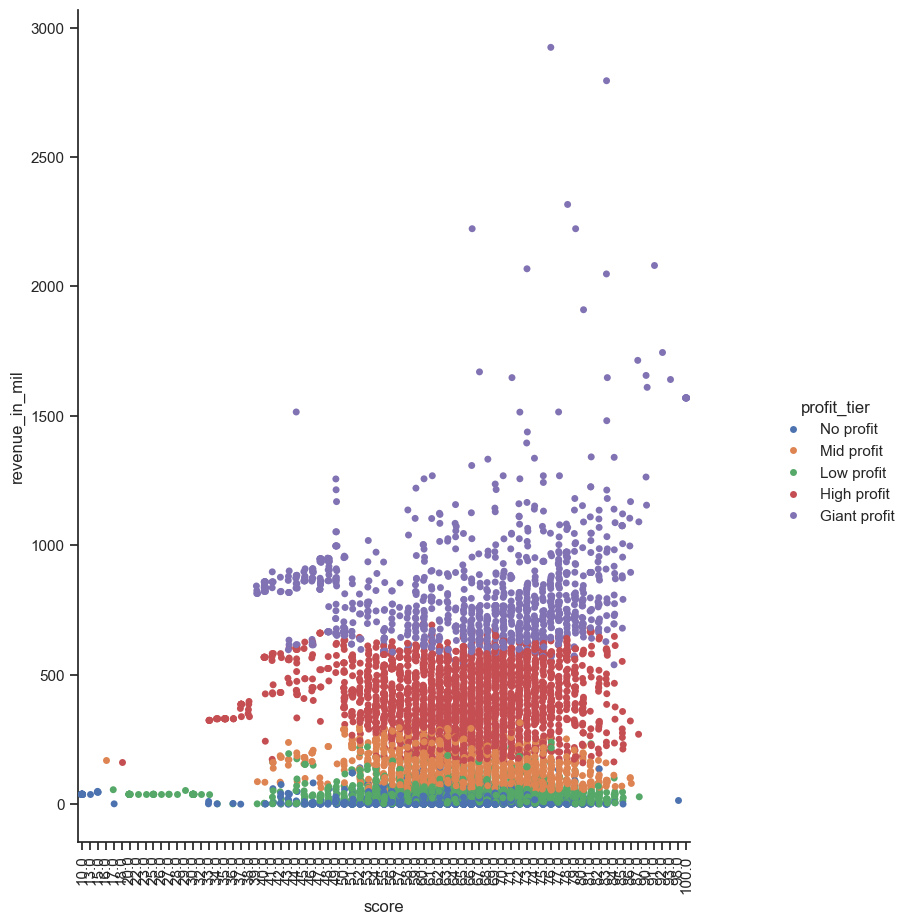

In [32]:
sns.set(style="ticks")
cp = sns.catplot(data=df,
                x='score',
                y='revenue_in_mil',
                hue='profit_tier'
               )
cp.tick_params(axis='x', rotation=90)
cp.fig.set_figwidth(10)
cp.fig.set_figheight(10)

#### Some high-rated movies weren't profitable.
>> #### --> TODO: Investigate rating scores.

In [33]:
#exporting data
df.to_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/imdb_movies_derived.csv')

#### Further questions:

>> #### - What other factors contribute to higher revenues generation? Genres? Actors?
>> #### - What factors lead to high movie ratings?

#### Research Hypothesis:

>> #### "If a movie has a higher budget, then it will generate higher revenues."